<a href="https://colab.research.google.com/github/20146467/BaiBaoCaoCuoiKy/blob/main/Nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/5loaihoa/Train'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 578 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


In [ ]:
validation_set.class_indices

{'hoa Bồ công anh': 0,
 'hoa cúc': 1,
 'hoa hồng': 2,
 'hoa hướng dương': 3,
 'hoa tulip': 4}

In [ ]:
{'.ipynb_checkpoints': 0,
 'hoa bo cong anh': 1,
 'hoa cuc': 2,
 'hoa hong': 3,
 'hoa huong duong':4,
 'hoa tulip': 5

 }

{'.ipynb_checkpoints': 0,
 'hoa bo cong anh': 1,
 'hoa cuc': 2,
 'hoa hong': 3,
 'hoa huong duong': 4,
 'hoa tulip': 5}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
5/5 [==============================] - 79s 14s/step - loss: 7.0539 - accuracy: 0.2076 - val_loss: 1.6096 - val_accuracy: 0.1935
Epoch 2/50
5/5 [==============================] - 73s 14s/step - loss: 1.5537 - accuracy: 0.3737 - val_loss: 1.3590 - val_accuracy: 0.3065
Epoch 3/50
5/5 [==============================] - 73s 14s/step - loss: 1.6197 - accuracy: 0.3253 - val_loss: 1.4798 - val_accuracy: 0.2419
Epoch 4/50
5/5 [==============================] - 74s 14s/step - loss: 1.3029 - accuracy: 0.4827 - val_loss: 1.0014 - val_accuracy: 0.6935
Epoch 5/50
5/5 [==============================] - 74s 14s/step - loss: 0.7764 - accuracy: 0.6626 - val_loss: 0.5811 - val_accuracy: 0.8226
Epoch 6/50
5/5 [==============================] - 73s 14s/step - loss: 0.4524 - accuracy: 0.7734 - val_loss: 1.1355 - val_accuracy: 0.8226
Epoch 7/50
5/5 [==============================] - 73s 16s/step - loss: 0.8211 - accuracy: 0.7630 - val_loss: 1.7187 - val_accuracy: 0.6129
Epoch 8/50
5/5 [===========

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 578 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


In [ ]:
model.save('/content/drive/MyDrive/Save_AI/H.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Save_AI/H.h5')

In [ ]:
label = ['hoa bo cong anh','hoa cuc','hoa hong','hoa huong duong','hoa tulip']


1/1 [==============================] - 0s 107ms/step
hoa cuc


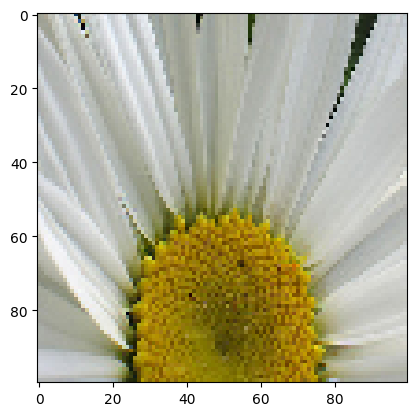

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/5loaihoa/Train/hoa cúc/C1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 157ms/step
hoa tulip


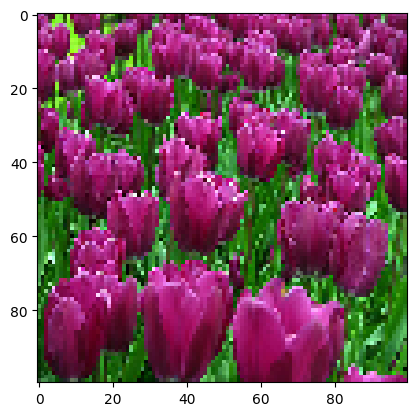

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/5loaihoa/Train/hoa tulip/t1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 97ms/step
hoa bo cong anh


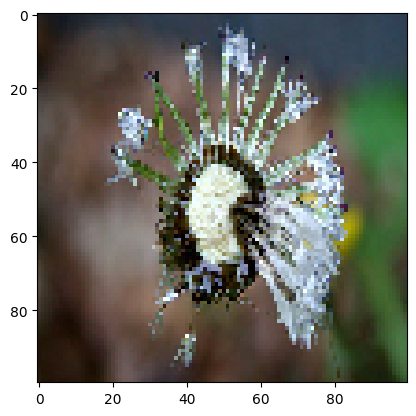

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/5loaihoa/Train/hoa Bồ công anh/BCA1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 219ms/step
hoa hong


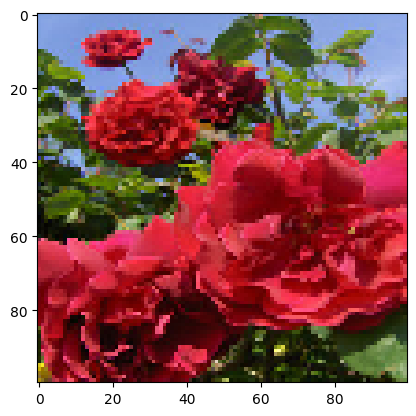

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/5loaihoa/Train/hoa hồng/h1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 116ms/step
hoa huong duong


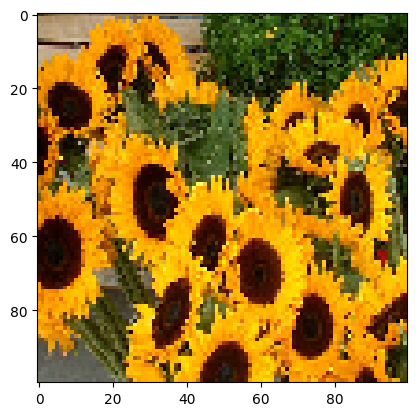

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/5loaihoa/Train/hoa hướng dương/hh1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])